In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torchvision
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [7]:
train_batch_size = 128#Define train batch size
test_batch_size  = 128#Define test batch size (can be larger than train batch size)

# Use the following code to load and normalize the dataset
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=train_batch_size, shuffle=True, drop_last=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=test_batch_size, shuffle=True, drop_last=True)

In [11]:
#Define your network:
class Network(nn.Module):
  def __init__(self): 
    super(Network, self).__init__()
    self.layer1 = nn.Linear(784, 100)
    self.layer2 = nn.Linear(100,50)
    self.layer3 = nn.Linear(50,75)
    self.output_layer = nn.Linear(75, 10)
    
  def forward(self, x):
    #How does your model process the input?
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.relu(self.layer3(x))
    output= F.softmax(self.output_layer(x), dim=1)
    return output

model = Network()
print(model)

optimizer = torch.optim.Adadelta(model.parameters(), lr=0.25)
loss_fn = nn.CrossEntropyLoss()


Network(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=75, bias=True)
  (output_layer): Linear(in_features=75, out_features=10, bias=True)
)
9984


In [12]:
epochs = 10
correct = 0
accuracy_list = np.zeros((epochs,))
train_losses = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = torch.reshape(images, (train_batch_size, 784))
        optimizer.zero_grad()
        out = model(images)
        loss = loss_fn(out,labels)
        train_losses.append(loss)
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            images = torch.reshape(images, (test_batch_size, 784))
            y_pred = model(images)
            correct += (torch.argmax(y_pred, dim=1) == labels).sum()
        accuracy = correct / (10000 - 10000 % train_batch_size)
        accuracy_list[epoch] = accuracy  
        correct = 0
               

([<matplotlib.axis.YTick at 0x2d5c0ee5fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

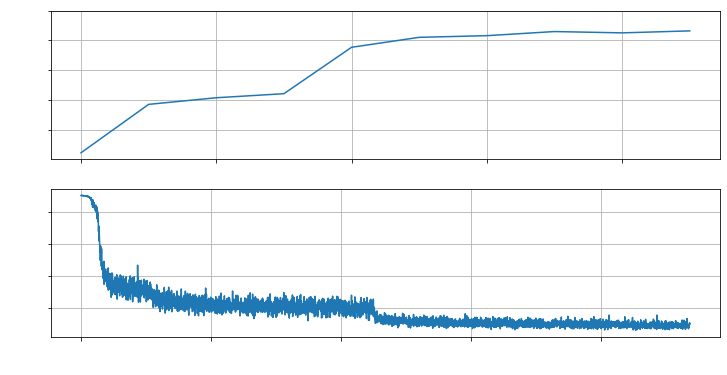

In [13]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=False)
ax1.plot(accuracy_list)
ax1.set_ylabel("Test Accuracy", color='w')
ax1.set_xlabel("Epochs", color='w')
ax1.grid()
ax1.tick_params(labelcolor='w')
ax2.plot(train_losses)
ax2.set_ylabel("Training Loss", color='w')
ax2.set_xlabel("Training Samples (batch size of 128)", color='w')
ax2.tick_params(labelcolor='w')
ax2.grid()
plt.sca(ax1)
plt.yticks(np.arange(0.8,1.05, step=0.05))

In [14]:
print(accuracy_list)

[0.76101762 0.84244794 0.85356569 0.8603766  0.93840146 0.95512819
 0.95793271 0.96484375 0.96264023 0.96594554]
